In [130]:
#importing the required libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [56]:
#Reading Data
data=pd.read_csv('Data.csv')

In [57]:
data.shape

(506, 14)

In [58]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [59]:
#adding a new feature with value 1
data['X0']=1

In [60]:
#rearanging data
data=pd.DataFrame(data, columns=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','Y'])

In [62]:
#normolizing data with (max-min) and subtracting mean 
data.iloc[:,1:14] = (data.iloc[:,1:14] - data.iloc[:,1:14].mean()) / (data.iloc[:,1:14].max() - data.iloc[:,1:14].min())
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,1,-0.126712,0.047047,-0.248564,-0.140765,-0.081290,-0.094410,0.065296,-0.091092,-0.115885,-0.062707,-0.069275,0.161654,-0.200667,24.0
1,1,-0.124605,-0.132953,-0.076970,-0.140765,-0.091249,-0.096007,0.203871,-0.052741,-0.114381,-0.140877,-0.062934,0.161654,-0.073372,21.6
2,1,-0.124607,-0.132953,-0.076970,-0.140765,-0.091249,-0.088085,0.023824,-0.052741,-0.114381,-0.140877,-0.062934,0.151392,-0.229737,34.7
3,1,-0.124098,-0.132953,-0.253250,-0.140765,-0.092837,-0.090024,-0.130935,-0.004858,-0.112877,-0.169829,-0.060652,0.155930,-0.263091,33.4
4,1,-0.120417,-0.132953,-0.253250,-0.140765,-0.092837,-0.088479,-0.045969,-0.004858,-0.112877,-0.169829,-0.060652,0.161654,-0.189957,36.2


In [63]:
# filling missing data with mean value of that attribute
data.head()
data=data.fillna(data.mean())

In [155]:
#spliting data to train and test 80% and 20%
train_X=data.iloc[0:400,0:14]
train_y=data.iloc[0:400,14]
test_X=data.iloc[400:,0:14]
test_y=data.iloc[400:,14]

In [171]:
#calculating weights in linear regression formulation using gradient descent
theta=np.ones(14)
alpha=0.0001
for k in range(0,500):
    h=train_X.dot(theta)
    dj=((h-train_y).dot(train_X))
    theta=theta-alpha*dj


In [172]:
#Predicting house price using linear regression for test data
predict=test_X.dot(theta)
#Calculating accuracy
accuracy=abs(test_y-predict)/test_y*100

<IPython.core.display.Javascript object>


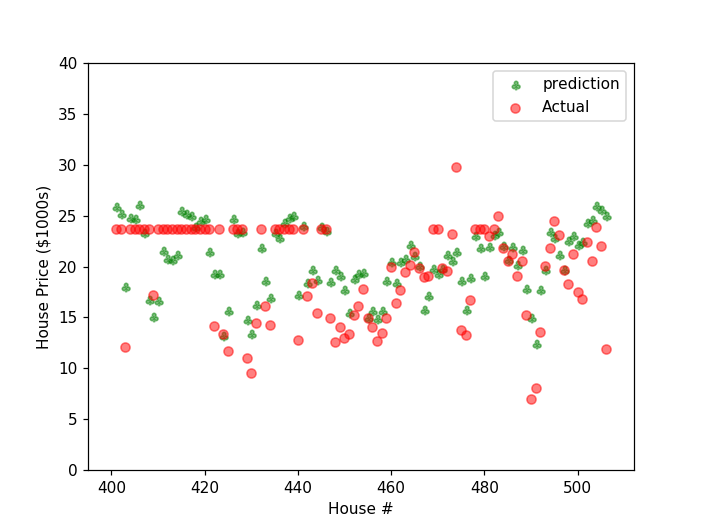

Text(0,0.5,'House Price ($1000s)')

In [173]:
#Plotting scatter plot for actual data and pediction for test data (test data ara from 400 to 506)
x=np.linspace(401,400+len(accuracy),len(accuracy))
plt.figure()
plt.scatter(x,predict, alpha=0.5, c='g', marker=r'$\clubsuit$', label='prediction')
plt.scatter(x,test_y, c='r',alpha=0.5, label='Actual')
plt.ylim([0,40])
plt.legend()
plt.xlabel('House #')
plt.ylabel('House Price ($1000s)')